In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

import scipy.stats as st
import numpy as np
from citipy import citipy
import time
import json
from pprint import pprint

## After calling 9 different JSON files from NOAA Climate at a Glance https://www.ncdc.noaa.gov/cag/statewide/time-series/ and downloading csv files from 
## https://quickstats.nass.usda.gov/ and doing some cleaning , object convertion to float an d some calculations this dataframe was created

In [2]:
Iowa_path = "output_data/Iowa_last_weather.csv"
Iowa_last_weather = pd.read_csv(Iowa_path)
Iowa_last_weather.head()

,Year,Seasonal_Drought,Seasonal_Max,Seasonal_temp,Jun mean Temp,Jul mean Temp,Aug mean Temp,Jun Max Temp,Jul MaxTemp,Aug MaxTemp,Jun Drought Severity,Jul Drought Severity,Aug Drought Severity,August Corn yield,August soybean yield,Season_corn_yield,Season_soybean_Yield
0,1980,-0.473333,84.866667,73.200000,69.6,76.7,73.3,81.5,88.8,84.3,-1.15,-1.63,1.36,7.2684,2.4228,7.4030,2.59105
1,1981,0.920000,81.700000,71.033333,70.2,73.3,69.6,82.0,83.0,80.1,0.30,0.88,1.58,8.4125,2.6920,8.4125,2.69200
2,1982,3.073333,80.200000,69.533333,64.5,74.1,70.0,75.7,84.8,80.1,2.44,3.29,3.49,8.2106,2.5574,8.0760,2.45645
3,1983,3.503333,86.566667,74.966667,69.6,77.2,78.1,80.5,88.8,90.4,4.60,3.61,2.30,7.6722,2.5574,5.8551,2.35550
4,1984,3.543333,83.733333,72.033333,70.5,72.2,73.4,81.3,83.9,86.0,4.14,4.00,2.49,8.2106,2.5574,7.5376,2.11995


## creating graphs of corn season yield vs seasonal average temp, max temp, and drought severity

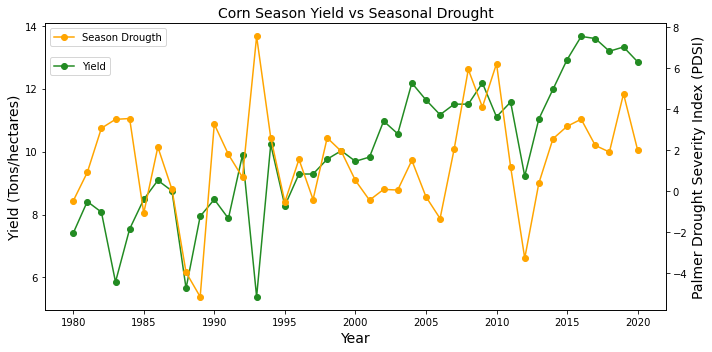

In [3]:
x_axis = Iowa_last_weather['Year']
y_axis=  Iowa_last_weather['Season_corn_yield']
y2_axis= Iowa_last_weather['Seasonal_Drought']

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o", label="Yield")
plt.legend(loc="center left", bbox_to_anchor=(0,0.6,0.5,0.5))
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Yield (Tons/hectares)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o", label="Season Drougth")
ax2.set_ylabel( "Palmer Drought Severity Index (PDSI)",fontsize=14)
plt.tight_layout()

plt.title("Corn Season Yield vs Seasonal Drought", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("output_data/Corn_season_drought.png")
plt.show()


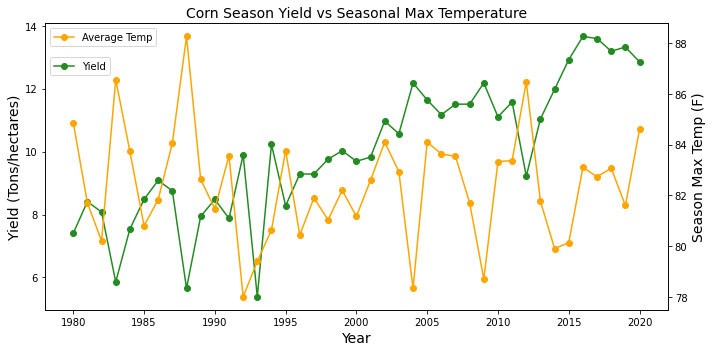

In [4]:
x_axis = Iowa_last_weather['Year']
y_axis=  Iowa_last_weather['Season_corn_yield']
y2_axis= Iowa_last_weather['Seasonal_Max']

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o", label="Yield")
plt.legend(loc="center left", bbox_to_anchor=(0,0.6,0.5,0.5))
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Yield (Tons/hectares)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o", label="Average Temp")
ax2.set_ylabel( "Season Max Temp (F)",fontsize=14)


plt.title("Corn Season Yield vs Seasonal Max Temperature", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("output_data/Corn_season_Max.png")
plt.show()

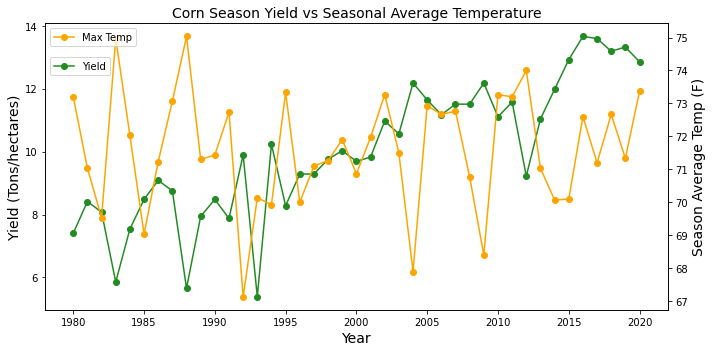

In [5]:
x_axis = Iowa_last_weather['Year']
y_axis=  Iowa_last_weather['Season_corn_yield']
y2_axis= Iowa_last_weather['Seasonal_temp']

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o", label="Yield")
plt.legend(loc="center left", bbox_to_anchor=(0,0.6,0.5,0.5))
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Yield (Tons/hectares)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o", label="Max Temp")
ax2.set_ylabel( "Season Average Temp (F)",fontsize=14)
plt.tight_layout()

plt.title("Corn Season Yield vs Seasonal Average Temperature", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("output_data/Corn_season_ave.png")
plt.show()

## Creating graphs for soybean season yield vs seasonal average temp, max temp, and drought severity

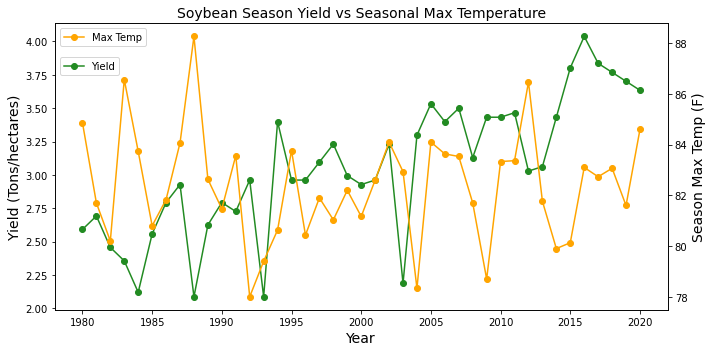

In [6]:
x_axis = Iowa_last_weather['Year']
y_axis=  Iowa_last_weather['Season_soybean_Yield']
y2_axis= Iowa_last_weather['Seasonal_Max']

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o", label="Yield")
plt.legend(loc="center left", bbox_to_anchor=(0,0.6,0.5,0.5))
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Yield (Tons/hectares)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o", label="Max Temp")
ax2.set_ylabel( "Season Max Temp (F)",fontsize=14)
plt.tight_layout()

plt.title("Soybean Season Yield vs Seasonal Max Temperature", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("output_data/Soybean_season_Max.png")
plt.show()

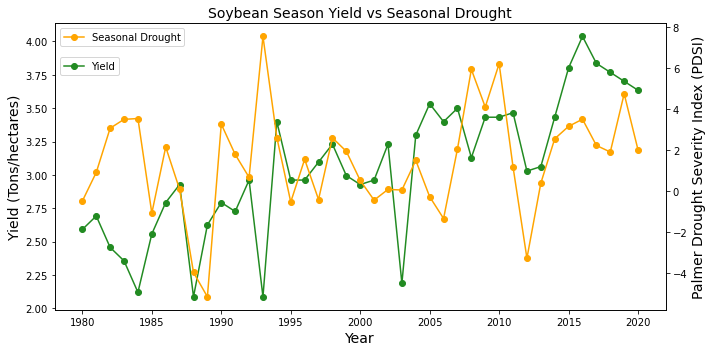

In [7]:
x_axis = Iowa_last_weather['Year']
y_axis=  Iowa_last_weather['Season_soybean_Yield']
y2_axis= Iowa_last_weather['Seasonal_Drought']

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o", label="Yield")
plt.legend(loc="center left", bbox_to_anchor=(0,0.6,0.5,0.5))
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Yield (Tons/hectares)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o", label="Seasonal Drought")
ax2.set_ylabel( "Palmer Drought Severity Index (PDSI)",fontsize=14)
plt.tight_layout()

plt.title("Soybean Season Yield vs Seasonal Drought", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("output_data/Soybean_season_drought.png")
plt.show()

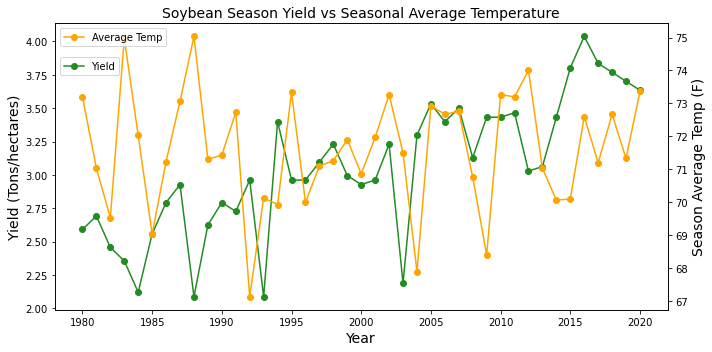

In [8]:
x_axis = Iowa_last_weather['Year']
y_axis=  Iowa_last_weather['Season_soybean_Yield']
y2_axis= Iowa_last_weather['Seasonal_temp']

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(x_axis, y_axis, color="forestgreen", marker="o", label="Yield")
plt.legend(loc="center left", bbox_to_anchor=(0,0.6,0.5,0.5))
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Yield (Tons/hectares)",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_axis, y2_axis,color="orange",marker="o", label="Average Temp")
ax2.set_ylabel( "Season Average Temp (F)",fontsize=14)
plt.tight_layout()

plt.title("Soybean Season Yield vs Seasonal Average Temperature", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("output_data/Soybean_season_ave.png")
plt.show()

## loading CSV weather yearly change and corn yield change per year in Iowa

In [9]:
change_path = "output_data/corn_change_yied.csv"
corn_change = pd.read_csv(change_path)
corn_change.head()

,year,yield change,average temp change,Max temp change,drought change
0,1980,-17,3.200000,3.233333,-3.113333
1,1981,15,-2.066667,-3.166667,1.393333
2,1982,-5,-1.366667,-1.500000,2.153333
3,1983,-33,3.766667,6.366667,0.430000
4,1984,25,-3.033333,-2.833333,0.040000


## creating graphs

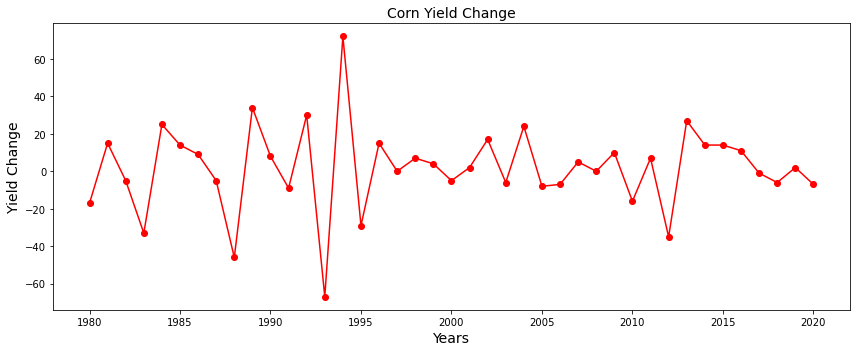

In [10]:
x_axis = corn_change['year']
y_axis=  corn_change['yield change']
plt.figure(figsize=(12,5))
Corn_change = plt.plot(x_axis,y_axis, color="red", marker="o")

plt.title("Corn Yield Change", fontsize=14)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Yield Change", fontsize=14)
plt.tight_layout()
plt.savefig("output_data/Corn_yield_change.png")
plt.show()

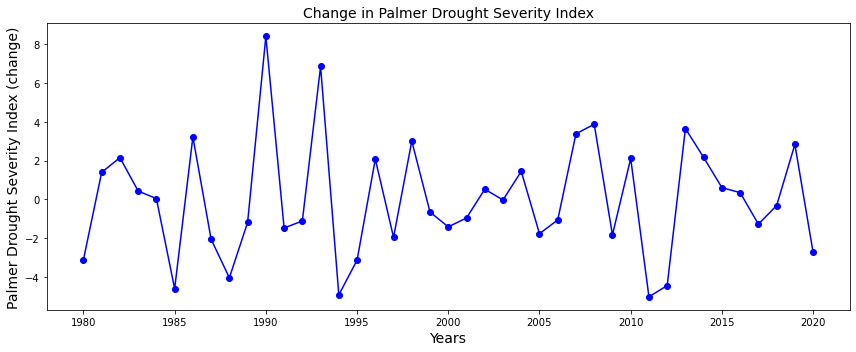

In [11]:
x_axis = corn_change['year']
y_axis=  corn_change['drought change']
plt.figure(figsize=(12,5))
Corn_change = plt.plot(x_axis,y_axis, color="blue", marker="o")

plt.title("Change in Palmer Drought Severity Index", fontsize=14)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Palmer Drought Severity Index (change)", fontsize=14)
plt.tight_layout()
plt.savefig("output_data/Drought_yield_change.png")
plt.show()

## loading CSV of normalized yield (normal hearthy corn yield and weather affected corn yield)

In [12]:
Normal_path= "output_data/Normal_affected_corn.csv"
nor_aff = pd.read_csv(Normal_path)
nor_aff.head()

,Normal,Affected
0,0.978862,0.887805
1,1.024390,0.762602
2,0.944715,0.819512
3,1.035772,0.648780
4,0.944715,0.808130


## checking for normality and doing Anova for this data

In [15]:
pvalue = st.shapiro(nor_aff['Normal'])
print(pvalue)

pvalue2 = st.shapiro(nor_aff['Affected'])
print(pvalue2)

(0.9547209739685059, 0.5037661194801331)
(0.9285202622413635, 0.1828833818435669)


In [16]:
st.f_oneway(nor_aff['Normal'], nor_aff['Affected'])

F_onewayResult(statistic=105.342625536768, pvalue=5.965494854271489e-12)

In [18]:
Normal_mean = nor_aff["Normal"].mean()
Affected_mean = nor_aff["Affected"].mean() 

Normal_std = nor_aff["Normal"].std()
Affected_std = nor_aff["Affected"].std()


stats = pd.DataFrame({"tield":["stats"], "N_mean": Normal_mean, "A_mean": Affected_mean})

stats

,tield,N_mean,A_mean
0,stats,1.0,0.743747


## creating bar plot

C:\Users\zorta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.


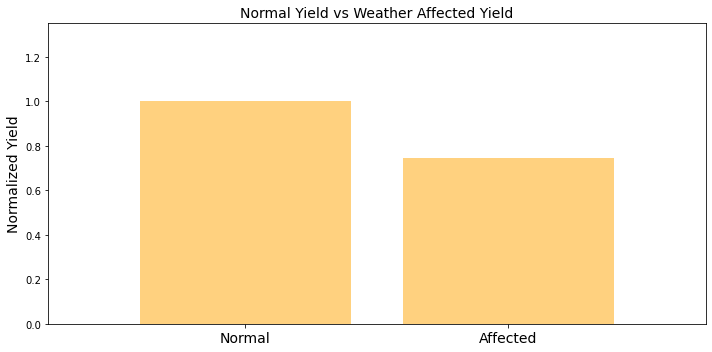

In [17]:
stats = [1.0, 0.744]
x_axis = np.arange(len(stats))
x_axis

plt.figure(figsize=(10,5))
plt.bar(x=x_axis,height=stats, color='orange', alpha=0.5, align="center")
plt.xticks(x_axis, ["Normal", "Affected"], fontsize=14)
plt.ylim(0, max(stats)*1.35)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title("Normal Yield vs Weather Affected Yield", Fontsize=14)
plt.ylabel("Normalized Yield", fontsize=14)
plt.tight_layout()
plt.savefig("output_data/Normalize_data.png")
